Self-Organizing Maps

In [1]:
from pre_processing_functions import *
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from minisom import MiniSom
import math

# Sklearn auxiliary items
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report


# Matplotlib Options
plt.rcParams['figure.figsize'] = [16, 8]
font = {'weight' : 'bold',
        'size'   : 14}
plt.rc('font', **font)

# Pandas options
pd.set_option("display.max_columns", None)

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

from sklearn.preprocessing import StandardScaler
import umap.umap_ as umap
import matplotlib.pyplot as plt
import seaborn as sns

%load_ext autoreload
%autoreload 2

In [2]:
df = preprocess('customer_info.csv')

In [3]:
df

,customer_id,customer_name,customer_gender,kids_home,teens_home,number_complaints,distinct_stores_visited,lifetime_spend_groceries,lifetime_spend_electronics,typical_hour,lifetime_spend_vegetables,lifetime_spend_nonalcohol_drinks,lifetime_spend_alcohol_drinks,lifetime_spend_meat,lifetime_spend_fish,lifetime_spend_hygiene,lifetime_spend_videogames,lifetime_spend_petfood,lifetime_total_distinct_products,percentage_of_products_bought_promotion,year_first_transaction,loyalty_card_number,latitude,longitude,customer_age,years_active,customer_educlevel
0,0.495840,-0.890763,1.0,1.0,1.0,0.0,0.5,-0.383867,0.608572,0.000000,0.311253,1.183721,0.535412,1.005882,1.191352,-0.266667,0.299685,0.569307,1.564706,-0.203406,0.428571,-1.0,-0.756663,0.891066,-0.032258,-0.428571,0.5
1,-0.659288,0.499118,0.0,-1.0,0.0,-1.0,0.5,-0.341946,-0.655351,0.142857,0.387819,-0.816279,-0.636892,-0.254412,-0.368896,-0.361582,-0.763407,-0.430693,-0.276471,2.508224,-0.285714,0.0,-0.382018,-0.185310,0.870968,0.285714,-1.0
2,0.971593,0.310227,1.0,1.0,2.0,-1.0,2.0,-0.004634,0.307465,0.142857,1.307773,1.225581,1.232030,0.601471,1.268961,0.430885,0.056782,-0.599010,1.170588,-0.348334,-0.571429,-1.0,1.146193,0.280837,-0.580645,0.571429,0.5
3,0.077452,0.236268,0.0,-1.0,-1.0,0.0,-1.0,-0.109680,3.053080,0.142857,-0.498492,-0.427907,1.214059,0.036765,0.073578,-0.745763,1.141956,-0.212871,0.594118,0.053267,-0.857143,-1.0,-0.173783,-0.076741,-0.161290,0.857143,0.5
4,-0.179488,-0.641838,0.0,0.0,0.0,0.0,1.0,1.627826,0.062674,0.142857,-0.231671,0.634884,-0.168605,0.101471,0.786171,0.620716,-0.646688,-0.836634,0.729412,0.200063,-0.428571,0.0,1.111081,0.220095,0.161290,0.428571,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34055,0.852667,0.309670,1.0,0.0,0.0,-1.0,-0.5,2.262033,0.528867,0.428571,0.412181,0.174419,0.864165,-0.333824,0.982714,0.623729,0.195584,-0.272277,0.252941,-0.194299,0.428571,-1.0,0.088333,1.506491,-0.903226,-0.428571,0.5
34056,0.370518,-0.059879,0.0,0.0,0.0,-1.0,0.0,0.018607,0.198694,0.000000,0.051392,0.686047,-0.013214,0.420588,-0.145139,0.474576,-0.170347,0.029703,1.523529,0.951700,0.571429,0.0,-0.080424,-0.344934,-0.419355,-0.571429,0.5
34057,0.976040,0.054433,1.0,0.0,-1.0,0.0,-0.5,-0.051892,1.331365,0.571429,-0.064617,-0.444186,-0.235201,-0.595588,0.766013,-0.400753,1.536278,-1.004950,0.635294,0.752447,0.428571,-1.0,0.584171,-0.435574,-0.935484,-0.428571,0.5
34058,-0.081949,-0.115705,1.0,0.0,0.0,0.0,0.5,1.053833,0.404428,-0.571429,-0.304756,0.074419,-0.199260,0.466176,0.193519,0.683992,0.264984,0.311881,0.182353,0.497291,0.000000,0.0,-0.446276,0.023679,0.322581,0.000000,-0.5


In [4]:
df.columns

Index(['customer_id', 'customer_name', 'customer_gender', 'kids_home',
       'teens_home', 'number_complaints', 'distinct_stores_visited',
       'lifetime_spend_groceries', 'lifetime_spend_electronics',
       'typical_hour', 'lifetime_spend_vegetables',
       'lifetime_spend_nonalcohol_drinks', 'lifetime_spend_alcohol_drinks',
       'lifetime_spend_meat', 'lifetime_spend_fish', 'lifetime_spend_hygiene',
       'lifetime_spend_videogames', 'lifetime_spend_petfood',
       'lifetime_total_distinct_products',
       'percentage_of_products_bought_promotion', 'year_first_transaction',
       'loyalty_card_number', 'latitude', 'longitude', 'customer_age',
       'years_active', 'customer_educlevel'],
      dtype='object')

In [5]:
features = ['kids_home', 
            'lifetime_spend_groceries', 
            'lifetime_spend_electronics', 
            'lifetime_spend_meat', 
            'lifetime_spend_videogames', 
            'year_first_transaction']

#TEMOS DE RESOLVER ISTO!!!

In [1]:
import numpy as np
from minisom import MiniSom
from sklearn.preprocessing import StandardScaler

def train_som_cluster(df, features, som_size=10, iterations=5000, sigma=1.0, learning_rate=0.5):
   
    df = df.copy()
    
    # 1. Extract and scale features
    X = df[features].values
    #X_scaled = StandardScaler().fit_transform(X)

    # 2. Initialize and train SOM
    som = MiniSom(x=som_size,
                  y=som_size, 
                  input_len=X.shape[1], 
                  sigma=sigma, 
                  learning_rate=learning_rate)
    
    som.random_weights_init(X_scaled)
    np.random.seed(42)
    som.train(X_scaled, num_iteration=iterations, verbose=True)

    # 3. Assign cluster to each data point
    df['som_cluster'] = ([som.winner(X_scaled[i]) for i in range(0, len(X_scaled))])
    return df


In [7]:
df = train_som_cluster(df, features, som_size=10, iterations=1000, sigma=1.0, learning_rate=0.5)

 [ 1000 / 1000 ] 100% - 0:00:00 left 
 quantization error: 0.857989969869302


In [8]:
df

,customer_id,customer_name,customer_gender,kids_home,teens_home,number_complaints,distinct_stores_visited,lifetime_spend_groceries,lifetime_spend_electronics,typical_hour,lifetime_spend_vegetables,lifetime_spend_nonalcohol_drinks,lifetime_spend_alcohol_drinks,lifetime_spend_meat,lifetime_spend_fish,lifetime_spend_hygiene,lifetime_spend_videogames,lifetime_spend_petfood,lifetime_total_distinct_products,percentage_of_products_bought_promotion,year_first_transaction,loyalty_card_number,latitude,longitude,customer_age,years_active,customer_educlevel,som_cluster
0,0.495840,-0.890763,1.0,1.0,1.0,0.0,0.5,-0.383867,0.608572,0.000000,0.311253,1.183721,0.535412,1.005882,1.191352,-0.266667,0.299685,0.569307,1.564706,-0.203406,0.428571,-1.0,-0.756663,0.891066,-0.032258,-0.428571,0.5,"(2, 9)"
1,-0.659288,0.499118,0.0,-1.0,0.0,-1.0,0.5,-0.341946,-0.655351,0.142857,0.387819,-0.816279,-0.636892,-0.254412,-0.368896,-0.361582,-0.763407,-0.430693,-0.276471,2.508224,-0.285714,0.0,-0.382018,-0.185310,0.870968,0.285714,-1.0,"(5, 4)"
2,0.971593,0.310227,1.0,1.0,2.0,-1.0,2.0,-0.004634,0.307465,0.142857,1.307773,1.225581,1.232030,0.601471,1.268961,0.430885,0.056782,-0.599010,1.170588,-0.348334,-0.571429,-1.0,1.146193,0.280837,-0.580645,0.571429,0.5,"(3, 6)"
3,0.077452,0.236268,0.0,-1.0,-1.0,0.0,-1.0,-0.109680,3.053080,0.142857,-0.498492,-0.427907,1.214059,0.036765,0.073578,-0.745763,1.141956,-0.212871,0.594118,0.053267,-0.857143,-1.0,-0.173783,-0.076741,-0.161290,0.857143,0.5,"(9, 2)"
4,-0.179488,-0.641838,0.0,0.0,0.0,0.0,1.0,1.627826,0.062674,0.142857,-0.231671,0.634884,-0.168605,0.101471,0.786171,0.620716,-0.646688,-0.836634,0.729412,0.200063,-0.428571,0.0,1.111081,0.220095,0.161290,0.428571,0.0,"(9, 7)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34055,0.852667,0.309670,1.0,0.0,0.0,-1.0,-0.5,2.262033,0.528867,0.428571,0.412181,0.174419,0.864165,-0.333824,0.982714,0.623729,0.195584,-0.272277,0.252941,-0.194299,0.428571,-1.0,0.088333,1.506491,-0.903226,-0.428571,0.5,"(8, 8)"
34056,0.370518,-0.059879,0.0,0.0,0.0,-1.0,0.0,0.018607,0.198694,0.000000,0.051392,0.686047,-0.013214,0.420588,-0.145139,0.474576,-0.170347,0.029703,1.523529,0.951700,0.571429,0.0,-0.080424,-0.344934,-0.419355,-0.571429,0.5,"(0, 9)"
34057,0.976040,0.054433,1.0,0.0,-1.0,0.0,-0.5,-0.051892,1.331365,0.571429,-0.064617,-0.444186,-0.235201,-0.595588,0.766013,-0.400753,1.536278,-1.004950,0.635294,0.752447,0.428571,-1.0,0.584171,-0.435574,-0.935484,-0.428571,0.5,"(7, 2)"
34058,-0.081949,-0.115705,1.0,0.0,0.0,0.0,0.5,1.053833,0.404428,-0.571429,-0.304756,0.074419,-0.199260,0.466176,0.193519,0.683992,0.264984,0.311881,0.182353,0.497291,0.000000,0.0,-0.446276,0.023679,0.322581,0.000000,-0.5,"(1, 5)"


In [10]:
df.groupby('som_cluster').size().sort_values()

som_cluster
(4, 1)      39
(0, 3)      48
(1, 2)      48
(4, 3)      51
(3, 1)      51
          ... 
(0, 2)     772
(5, 6)     842
(5, 4)     961
(4, 0)    1079
(5, 0)    1227
Length: 100, dtype: int64

In [11]:
import umap

/Users/matildepanarra/anaconda3/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/var/folders/yj/p6trxhdn1dq3xs35wd17nbzr0000gn/T/ipykernel_83558/4070571096.py:15: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


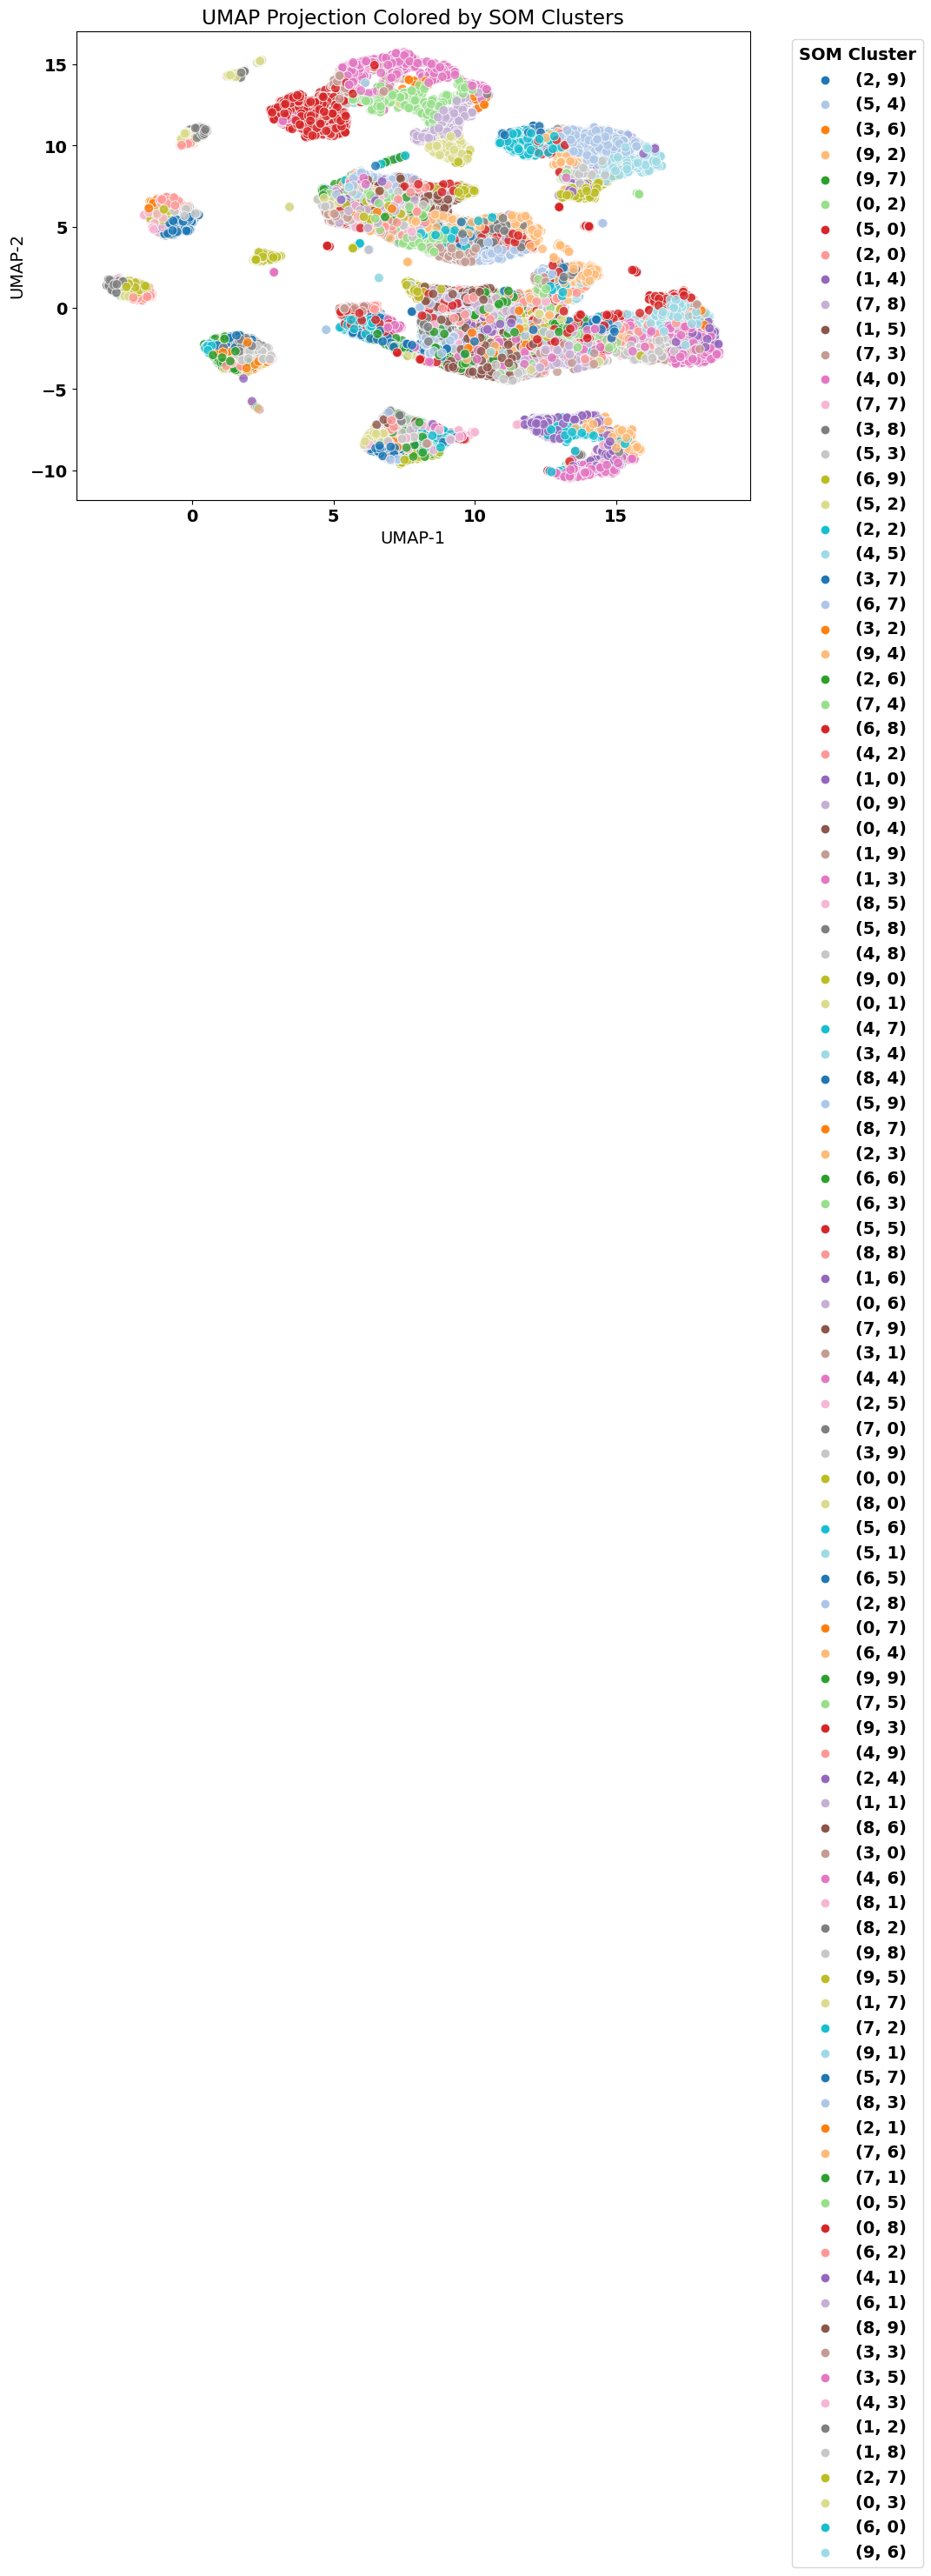

In [12]:
 # Fit UMAP
umap_object = umap.UMAP(n_neighbors=5, random_state=2)
umap_embedding = umap_object.fit_transform(df[features])
# Optional: Add UMAP coordinates to df
df['umap_1'] = umap_embedding[:, 0]
df['umap_2'] = umap_embedding[:, 1]
## Plot UMAP colored by SOM clusters
plt.figure(figsize=(10, 7))
sns.scatterplot(x='umap_1', y='umap_2', data=df, hue=df['som_cluster'].astype(str),
                palette='tab20', s=60, alpha=0.8)
plt.title("UMAP Projection Colored by SOM Clusters")
plt.xlabel("UMAP-1")
plt.ylabel("UMAP-2")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='SOM Cluster')
plt.tight_layout()
plt.show()


In [41]:
def UMAP(df):
    # Fit UMAP
    umap_object = umap.UMAP(n_neighbors=5, random_state=2)
    umap_embedding = umap_object.fit_transform(df[features])

    # Optional: Add UMAP coordinates to df
    df['umap_1'] = umap_embedding[:, 0]
    df['umap_2'] = umap_embedding[:, 1]

    # Plot UMAP colored by SOM clusters
    plt.figure(figsize=(10, 7))
    sns.scatterplot(x='umap_1', y='umap_2', data=df, hue=df['som_cluster'].astype(str),
                    palette='tab20', s=60, alpha=0.8)
    plt.title("UMAP Projection Colored by SOM Clusters")
    plt.xlabel("UMAP-1")
    plt.ylabel("UMAP-2")
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='SOM Cluster')
    plt.tight_layout()
    plt.show()


In [26]:
# Standardize features
#X_scaled = StandardScaler().fit_transform(df[features])

# Fit UMAP
umap_object = umap.UMAP(n_neighbors=5, random_state=2)
umap_embedding = umap_object.fit_transform(df[features])


/Users/matildepanarra/anaconda3/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


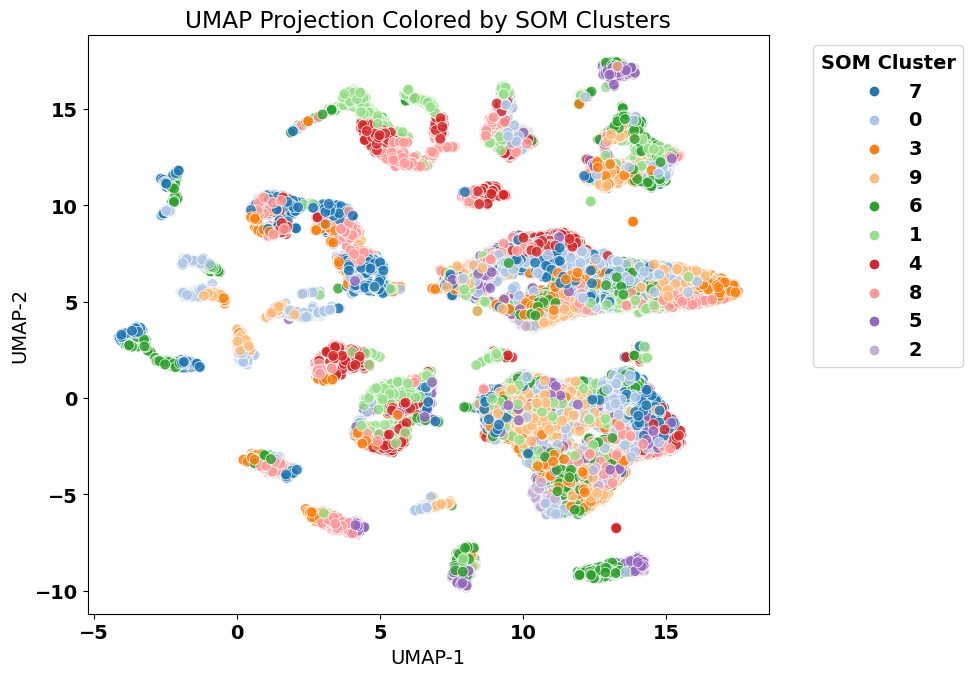

In [27]:
# Optional: Add UMAP coordinates to df
df['umap_1'] = umap_embedding[:, 0]
df['umap_2'] = umap_embedding[:, 1]

# Plot UMAP colored by SOM clusters
plt.figure(figsize=(10, 7))
sns.scatterplot(x='umap_1', y='umap_2', data=df, hue=df['som_cluster'].astype(str),
                palette='tab20', s=60, alpha=0.8)
plt.title("UMAP Projection Colored by SOM Clusters")
plt.xlabel("UMAP-1")
plt.ylabel("UMAP-2")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='SOM Cluster')
plt.tight_layout()
plt.show()